In [10]:
import pandas as pd

df = pd.read_csv('descriptive_table.csv')
df.head()

,Year,Barley Production (Metric Tons),Average Price Index,Average Mean Temperature (C) [June - Nov],Average Total Precipitation (mm) [June - Nov]
0,1985.0,"12,387,000",112.260833,7.308333,214.0
1,1986.0,"14,568,000",79.617083,9.283333,183.7
2,1987.0,"13,916,100",59.656250,10.983333,261.0
3,1988.0,"10,326,100",81.370833,11.008333,147.1
4,1989.0,"11,784,100",102.227500,10.883333,262.8


In [8]:
from linearmodels.iv import IV2SLS

df = pd.read_csv('data_table.csv')

formula = 'Log_Price ~ [Log_Quantity ~ Temp + Rainfall]'
model = IV2SLS.from_formula(formula, df)
results = model.fit()

print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              Log_Price   R-squared:                      0.9973
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9972
No. Observations:                  22   F-statistic:                    7665.0
Date:                Tue, Dec 05 2023   P-value (F-stat)                0.0000
Time:                        03:55:42   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Log_Quantity     0.2781     0.0032     87.550     0.0000      0.2719      0.2843

Endogenous: Log_Quantity
Instruments: Temp,

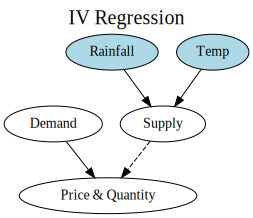

In [15]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np

g = graphviz.Digraph()
g.attr('graph', label='IV Regression', labelloc='t', fontsize='20')
g.edge('Supply', 'Price & Quantity', _attributes={'style': 'dashed'})
g.edge('Demand', 'Price & Quantity')
g.edge('Rainfall', 'Supply')
g.edge('Temp', 'Supply')

g.node('Rainfall', fillcolor='lightblue', style='filled')
g.node('Temp', fillcolor='lightblue', style='filled')

g

The first stage regression is as follows:

$Log(Price) = \beta_1 \cdot Total Rainfall + \beta_2 \cdot Average Temp$

Where $TotalRainfall$ is the total rainfall in the growing season and $AverageTemp$ is the average temperature in the growing season. The growing season is defined as the months from June to November which is when barley is typcally grown.

The second stage regression is as follows:

$Log(Quantity) = \beta_1 \cdot Log(Price)$

$Log(Quantity)$ and $Log(Price)$ were chosen in order to recover teh price elastcity of supply. 

Data for the produciton of barley was obatained from StatCan, specifically the  32-10-0359-01 table, this provided us with production data for the whole of Canada. The data stretches all the way back to 1908.

For our pricing data, we obtained it from StatCan, specifically the 32-10-0077-01 table, this provided us with pricing indexes brokwn down by province. While there was a slight discrepancy in teh prices between provinces, we felt it appropriate to get the average prices using both Alberta and Saskatchewan as they are the two largest producers of barley in Canada. This data however only stretches back to 1980, limitng our number of observations. 

Getting climate data was the most challenging and would be teh factor that would limit our number of observations the most. We obtained our climate data from the Government of Canada's Climate Data Online website. This data was broken down by various weather stations across Canada, which presented an opportunity to fine tune our data to specific regions. After obatining a map that showed the concentration of barley production in Canada from the USDA, we setteled on weather station data for Lethbridge in Alberta and Prince Albert in Saskatchewan. Further, we limited our data to the months of June to November, which is when barley is typically grown. Computing the average temperature and total rainfall for each year in those months giving us our climate data. The data from oth weather stations stretched all the way back to 1937, but unfortunately only had data till 2007.

Accounting for all those limitations, we ended up with 22 years of observations. 

Given that almost 89% of barley production in Canada is in Alberta and Saskatchewan, we felt that the data we had was representative of the whole of Canada.

While the data we obatined had monthly observations, we felt that it would be more appropriate to use yearly averages for our analysis. This is because farmers would be making their planting decisions on a yearly basis, and would not be able to significantly adjust their output once the growing season has started.

Looking  at the results from the IV regression, we see that the first stage regression is significant at the 1% level, and that the F-statistic is 7665, which is well above the 2.5 threshold. This indicates that our instruments are strong. We also found an extremely high R-squared value of 0.99, which indicates that prices are highly correlated with quantity. Additionally, in spite of the low number of observations, the standard erros for our log quantity variable are very low, resluting in a tight confidence interval.

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035901&pickMembers%5B0%5D=2.19&cubeTimeFrame.startYear=1985&cubeTimeFrame.endYear=2023&referencePeriods=19850101%2C20230101

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210007701

https://climate.weather.gc.ca/climate_data/monthly_data_e.html?hlyRange=1953-01-01%7C2013-11-14&dlyRange=1942-12-01%7C2013-11-13&mlyRange=1942-01-01%7C2007-11-01&StationID=3322&Prov=SK&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1985&EndYear=2023&selRowPerPage=25&Line=1&searchMethod=contains&Month=12&Day=3&txtStationName=PRINCE+ALBERT&timeframe=3&Year=2007

https://climate.weather.gc.ca/climate_data/monthly_data_e.html?hlyRange=1953-01-01%7C2012-06-07&dlyRange=1938-01-01%7C2008-07-28&mlyRange=1938-01-01%7C2007-08-01&StationID=2263&Prov=AB&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1985&EndYear=2023&selRowPerPage=25&Line=0&searchMethod=contains&Month=12&Day=3&txtStationName=LETHBRIDGE+A&timeframe=3&Year=2007

https://weather.gc.ca/forecast/canada/index_e.html?id=AB

https://weather.gc.ca/forecast/canada/index_e.html?id=SK

https://ipad.fas.usda.gov/rssiws/al/crop_production_maps/Canada/Canada_Barley.png